<a href="https://colab.research.google.com/github/JaeHeee/Tensorflow_practice/blob/master/keras_practice/reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집는다.
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 리뷰를 디코딩한다. 0,1,2 는 패딩, 문서 시작, 사전에 없음을 위한 인덱스이므로 3을

557056/550378 [==============================] - 0s 1us/step


In [4]:
print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0 인 행렬 만든다.
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # result[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 58ms/step - loss: 2.5750 - accuracy: 0.5383 - val_loss: 1.7241 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.4143 - accuracy: 0.7012 - val_loss: 1.3118 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0667 - accuracy: 0.7658 - val_loss: 1.1366 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8471 - accuracy: 0.8155 - val_loss: 1.0369 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6805 - accuracy: 0.8596 - val_loss: 0.9825 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5491 - accuracy: 0.8879 - val_loss: 0.9411 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4449 - accuracy: 0.9080 - val_loss: 0.9026 - val_accuracy: 0.8130
Epoch 8/20
16

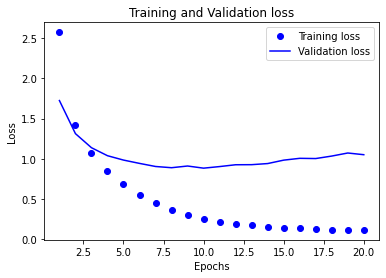

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

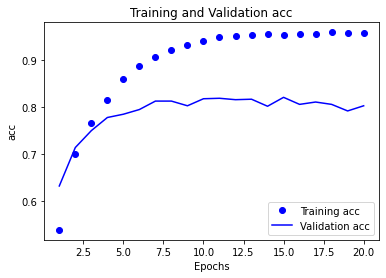

In [14]:
plt.clf() # 그래프 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [15]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 49ms/step - loss: 2.5764 - accuracy: 0.5352 - val_loss: 1.7087 - val_accuracy: 0.6370
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.4001 - accuracy: 0.7102 - val_loss: 1.2939 - val_accuracy: 0.7040
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0417 - accuracy: 0.7798 - val_loss: 1.1248 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8200 - accuracy: 0.8280 - val_loss: 1.0259 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 44ms/step - loss: 0.6528 - accuracy: 0.8623 - val_loss: 0.9592 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 0.5190 - accuracy: 0.8934 - val_loss: 0.9009 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 1s 44ms/step - loss: 0.4159 - accuracy: 0.9156 - val_loss: 0.8941 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [16]:
results

[1.0577048063278198, 0.7747105956077576]

In [0]:
predictions = model.predict(x_test)

In [18]:
predictions[0].shape

(46,)

In [20]:
np.sum(predictions[0])

1.0000001

In [21]:
np.argmax(predictions[0])

3